<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Fraud_check_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data = pd.get_dummies(data=data, columns=['Undergrad','Urban'], drop_first=True)

In [5]:
data = pd.get_dummies(data=data, columns=['Marital.Status'])

In [6]:
data['Tax_inc'] = pd.cut(data['Taxable.Income'], bins=(10000,30000,99620),labels=('risky','Good'))

In [7]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc
0,68833,50047,10,0,1,0,0,1,Good
1,33700,134075,18,1,1,1,0,0,Good
2,36925,160205,30,0,1,0,1,0,Good
3,50190,193264,15,1,1,0,0,1,Good
4,81002,27533,28,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0,Good
596,69967,55369,2,1,1,1,0,0,Good
597,47334,154058,0,0,1,1,0,0,Good
598,98592,180083,17,1,0,0,1,0,Good


In [8]:
data = pd.get_dummies(data, columns=['Tax_inc'], drop_first=True)

In [9]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc_Good
0,68833,50047,10,0,1,0,0,1,1
1,33700,134075,18,1,1,1,0,0,1
2,36925,160205,30,0,1,0,1,0,1
3,50190,193264,15,1,1,0,0,1,1
4,81002,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0,1
596,69967,55369,2,1,1,1,0,0,1
597,47334,154058,0,0,1,1,0,0,1
598,98592,180083,17,1,0,0,1,0,1


In [10]:
x = data.iloc[:,1:8]
y = data.iloc[:,8]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=6)

In [13]:
from sklearn.ensemble import RandomForestClassifier as RF

In [17]:
model = RF(n_estimators=12,criterion='entropy',oob_score=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


In [18]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [19]:
model.oob_score_


0.7142857142857143

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


[Text(0.48223684210526313, 0.9666666666666667, 'Urban_YES <= 0.5\nentropy = 0.656\nsamples = 275\nvalue = [71, 349]\nclass = 1'),
 Text(0.2618421052631579, 0.9, 'Work.Experience <= 17.5\nentropy = 0.67\nsamples = 135\nvalue = [36, 169]\nclass = 1'),
 Text(0.18421052631578946, 0.8333333333333334, 'Work.Experience <= 2.5\nentropy = 0.808\nsamples = 80\nvalue = [30, 91]\nclass = 1'),
 Text(0.1736842105263158, 0.7666666666666667, 'entropy = 0.0\nsamples = 13\nvalue = [0, 19]\nclass = 1'),
 Text(0.19473684210526315, 0.7666666666666667, 'City.Population <= 184979.5\nentropy = 0.874\nsamples = 67\nvalue = [30, 72]\nclass = 1'),
 Text(0.18421052631578946, 0.7, 'Marital.Status_Single <= 0.5\nentropy = 0.896\nsamples = 64\nvalue = [30, 66]\nclass = 1'),
 Text(0.11578947368421053, 0.6333333333333333, 'Marital.Status_Divorced <= 0.5\nentropy = 0.94\nsamples = 30\nvalue = [15, 27]\nclass = 1'),
 Text(0.04736842105263158, 0.5666666666666667, 'City.Population <= 100545.5\nentropy = 0.998\nsamples = 1

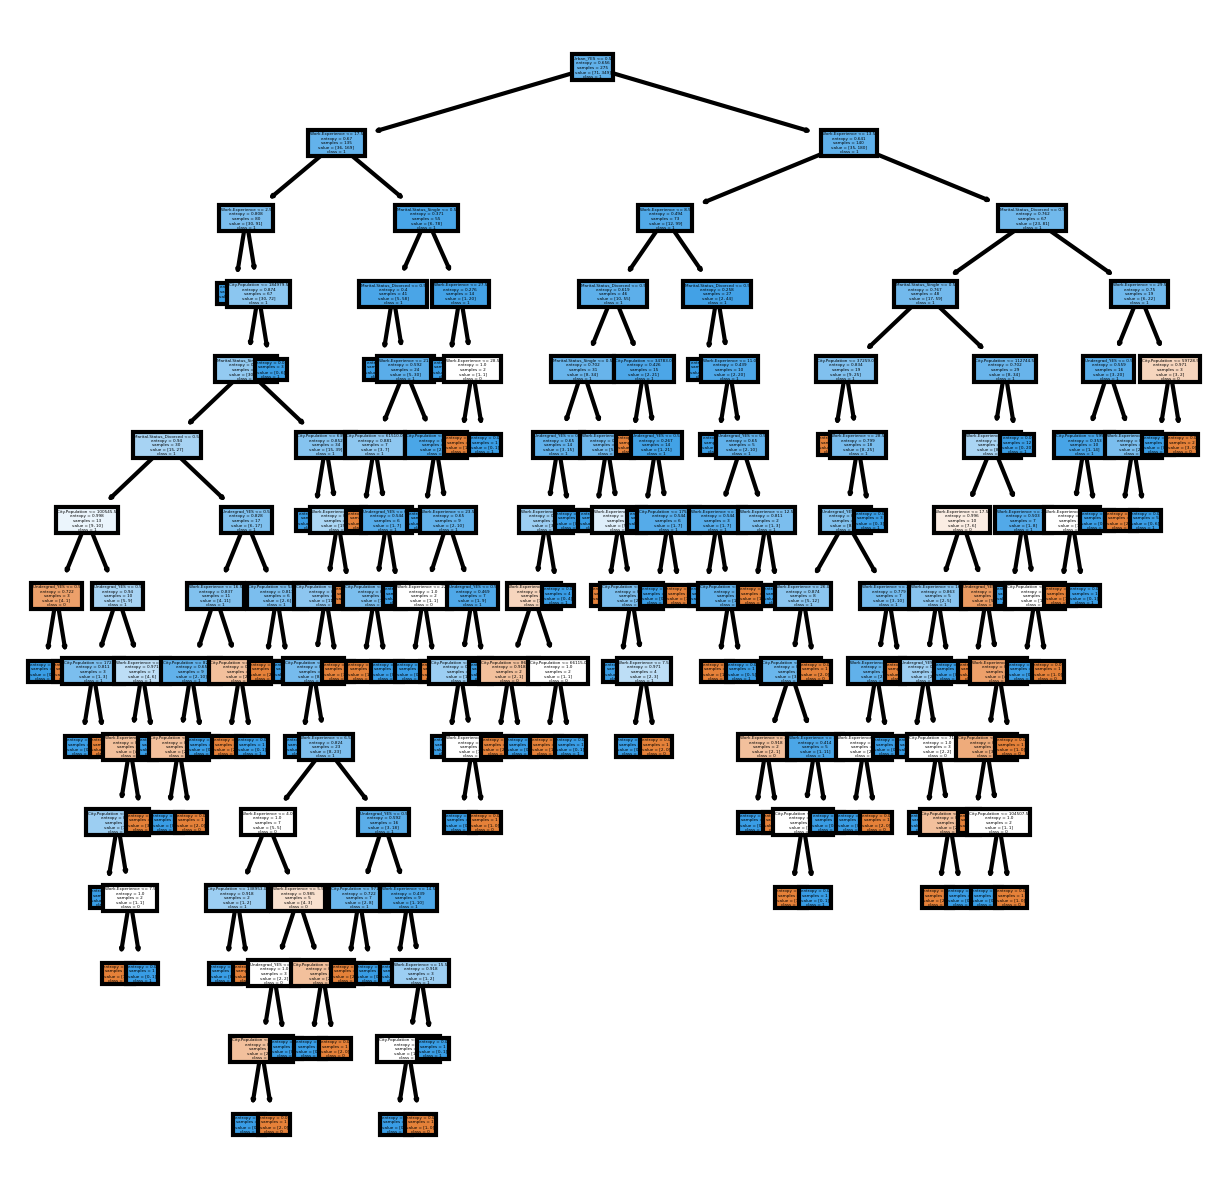

In [25]:
fn = ['City.Population',	'Work.Experience',	'Undergrad_YES',	'Urban_YES',	'Marital.Status_Divorced',	'Marital.Status_Married',	'Marital.Status_Single',	]
cn = ['0','1']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
plot_tree(model.estimators_[6],feature_names=fn,class_names=cn,filled=True)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accu = accuracy_score(y_test,y_pred)

In [28]:
accu

0.6833333333333333

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cv1 = cross_val_score(model,x_train,y_train,cv=6)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

In [31]:
cv1

array([0.78571429, 0.78571429, 0.72857143, 0.78571429, 0.78571429,
       0.8       ])

In [32]:
mean = cv1.mean()*100

In [35]:
mean

77.85714285714285

In [33]:
cv = cross_val_score(model,x_train,y_train,cv=8)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

In [34]:
cv.mean()

0.7571661828737299

In [36]:
print(f'The cross validation score for 6folds is {mean}')

The cross validation score for 6folds is 77.85714285714285


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

In [39]:
cm = confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[  3,  45],
       [ 12, 120]])

In [41]:
y_prob = model.predict_proba(x_test)[:,1]

In [42]:
y_prob

array([0.83333333, 0.58333333, 0.58333333, 0.66666667, 0.83333333,
       1.        , 0.91666667, 0.75      , 0.66666667, 0.66666667,
       0.58333333, 0.83333333, 0.83333333, 0.91666667, 0.91666667,
       0.83333333, 0.91666667, 0.91666667, 0.66666667, 0.83333333,
       1.        , 0.75      , 0.66666667, 0.91666667, 1.        ,
       0.83333333, 1.        , 0.16666667, 0.41666667, 0.75      ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.75      , 1.        , 0.75      , 0.91666667, 1.        ,
       0.75      , 1.        , 1.        , 1.        , 0.83333333,
       0.75      , 0.75      , 0.66666667, 0.91666667, 0.91666667,
       1.        , 0.91666667, 0.75      , 1.        , 0.91666667,
       0.75      , 0.91666667, 0.91666667, 0.83333333, 0.75      ,
       0.91666667, 0.58333333, 0.83333333, 0.66666667, 0.58333333,
       0.83333333, 0.5       , 0.66666667, 1.        , 0.33333333,
       0.75      , 0.91666667, 0.66666667, 0.83333333, 0.83333

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

In [45]:
fpr,tpr,thresholds

(array([0.        , 0.29166667, 0.54166667, 0.6875    , 0.79166667,
        0.875     , 0.9375    , 0.95833333, 0.97916667, 1.        ,
        1.        ]),
 array([0.        , 0.26515152, 0.40909091, 0.54545455, 0.68181818,
        0.83333333, 0.90909091, 0.93181818, 0.96212121, 0.97727273,
        1.        ]),
 array([2.        , 1.        , 0.91666667, 0.83333333, 0.75      ,
        0.66666667, 0.58333333, 0.5       , 0.41666667, 0.33333333,
        0.08333333]))

In [46]:
df = auc = roc_auc_score(y_test,y_pred)

In [47]:
auc

0.4857954545454546

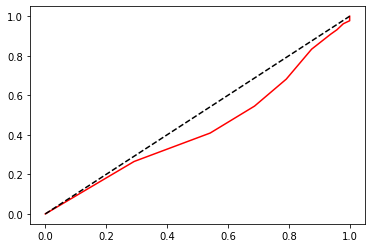

In [48]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')

In [49]:
from sklearn.preprocessing import normalize

In [54]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [55]:
df_norm = norm_func(data.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,0.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,0.0,0.0,1.0,1.0
593,0.610256,0.333333,0.0,1.0,1.0,0.0,0.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,0.0,0.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
x1 = data.iloc[:,1:8]
y1 = data.iloc[:,8]

In [57]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.3,random_state=6)

In [58]:
mod = RF(n_estimators=12,criterion='entropy',oob_score=True)

In [59]:
mod.fit(x1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(criterion='entropy', n_estimators=12, oob_score=True)

In [60]:
y1_pred = mod.predict(x1_test)

In [61]:
np.mean(y1_test==y1_pred)

0.6722222222222223

In [62]:
y1_prob = mod.predict_proba(x1_test)[:,1]

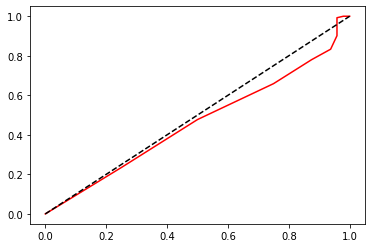

In [63]:
fpr,tpr,thresholds = roc_curve(y1_test,y1_prob)
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')


In [64]:
auc = roc_auc_score(y1_test,y1_pred)

In [65]:
auc

0.47159090909090906